<h2>Count reads</h2>

In [1]:
with open('./SRR8185316.fastq', 'r') as f:
    temp = f.readlines()
count = len(temp) // 4
print(f"This FASTQ file has {count} reads")

This FASTQ file has 2297280 reads


<h2>First read</h2>

In [2]:
first_read = []
with open('./SRR8185316.fastq', 'r') as f:
    for i in range(4):
        first_read.append(f.readline())
print(f"First read:\n\nIdentifier: {first_read[0]}\nSequence: {first_read[1]}\nQuality: {first_read[-1]}")

First read:

Identifier: @SRR8185316.1 ERR022075.10741970 length=100

Sequence: AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA

Quality: IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1



<h2>Find desired sub-sequence</h2>

In [3]:
sub_sequence_target = 'TTAAATGGAA'
count = 0
for i in range(1, len(temp), 4):
    if sub_sequence_target in temp[i]:
        count += temp[i].count(sub_sequence_target)
print(f"Sub-sequence = TTAAATGGAA\nOccurance = {count}")

Sub-sequence = TTAAATGGAA
Occurance = 179


<h2>Copy first 1000 reads into a new file</h2>

In [4]:
reads = temp[:4000]
with open('.\SRR8185316_first4000.fastq', 'w') as f:
    f.writelines(reads)
print("New file created")

New file created


[First 4000 reads](./SRR8185316_first4000.fastq)

<h2>Boxplot of first 100000 reads</h2>

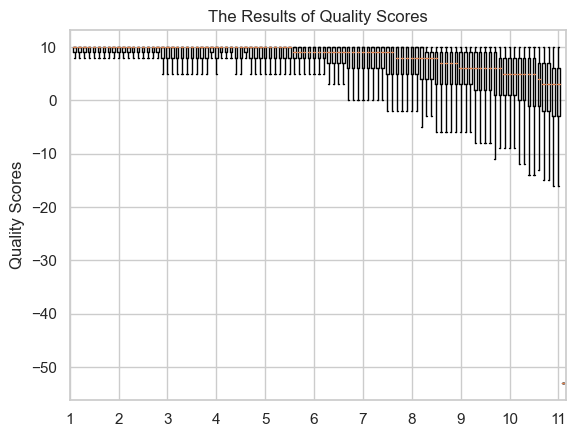

In [8]:
import matplotlib.pyplot as plt
import copy


reads_boxplot = temp[:400000]  # Stores first 100000 reads
quality_phred_scores = [[]*100]  # Stores phred quality scores of first 100000 reads here
offset = 63  # To substract from ASCII numbers

# Parse phred scores
for i in range(3, 400000, 4):
    for j in range(len(reads_boxplot[i])):
        score = int(ord(reads_boxplot[i][j]) - offset)
        try:
            quality_phred_scores[j].append(copy.deepcopy(score))
        except IndexError:
            quality_phred_scores.append([copy.deepcopy(score)])

# Boxplots
fig, ax = plt.subplots()
ax.boxplot(quality_phred_scores, showfliers=False)
ax.set_ylabel("Quality Scores")
ax.set_title("The Results of Quality Scores")
plt.xticks(range(0, 101, 10))
plt.show()

<h2>Density Plot of reads' length</h2>

C:\Users\Yazdan\AppData\Local\Temp\ipykernel_3612\1084464779.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)
C:\Users\Yazdan\AppData\Local\Temp\ipykernel_3612\1084464779.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, shade=True)


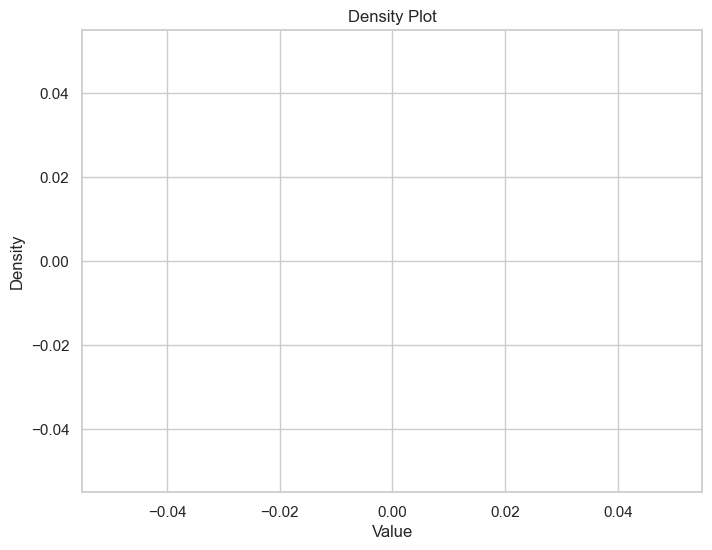

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Generating sample data
data = []
for i in range(0, len(temp)-1, 2):
    lenght_index = temp[i].find('length')
    index = lenght_index + 7
    length = temp[i][index:-1]
    data.append(copy.deepcopy(int(length)))

# Create a density plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data, shade=True)
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

<p><b>NOTE:</b> As you can see no diagram ploted by matplotlib casue all the length values were equal to 100</p>

<h2>Histogram of lengths</h2>

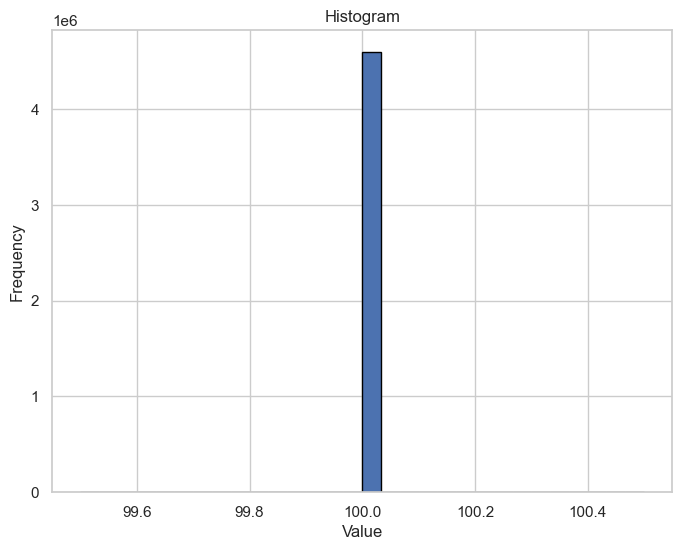

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<p><b>NOTE:</b> As you can see in the histogram all the values are equal to 100</p>

<h2>FastQC Results</h2>

<iframe src="./SRR8185316_fastqc.html" width="100%" height="400px"></iframe>


![FastQC Phred Score](./FastQC.png)


<h2>Analyzes of the FastQC report</h2>
<h4>Plot Interpretion</h4>
<ul>
    <li>This plot displays the quality scores for each base position in a set of reads. The y-axis shows the quality scores, and the x-axis represents the base positions across all reads. The higher the score, the better the quality of the base call.</li>
</ul>
<h4>Color Grading</h4>
<ul>
    <li><b>Green:</b> represents very good quality scores (usually scores above 30), which indicate very low chances of sequencing errors.</li>
    <li><b>Yellow:</b> indicates good quality scores, which are typically acceptable for most types of analyses.</li>
    <li><b>Orange:</b> is fair quality.</li>
    <li><b>Red:</b> indicates poor quality, where the base calls are unreliable and have a high chance of error.</li>
</ul>
<h4>Box Plot Elements</h4>
<ul>
    <li><b>Boxes:</b> The main part of each box shows the interquartile range (IQR) of quality scores for that base position.</li>
    <li><b>Lines within the Boxes:</b> The lines within the boxes represent the median quality score for that base.</li>
    <li><b>Whiskers:</b> The whiskers extend from the boxes to show the range of the data, excluding outliers.</li>
</ul>
<h4>Quality Score Trend</h4>
<ul>
    <li>From the phred score in FastQC, we can see that the initial bases have very high-quality scores (in the green zone), which is typical as sequence quality tends to be highest at the beginning.</li>
    <li>As the base position increases, there is a trend toward decreasing quality, which is common in sequencing data. The quality drops more significantly towards the end of the reads, entering the yellow zone and potentially the red zone.</li>
</ul>
<h4>Overall Assessment</h4>
<ul>
    <li>The quality seems to be excellent at the start but shows a clear decrease as the reads progress.</li>
    <li>The plot indicates that the quality of sequencing is high enough for most positions but may require trimming of the final bases for some reads due to lower quality towards the end.</li>
</ul>